<a href="https://colab.research.google.com/github/hyunnjjung/DF_ML_Basic/blob/main/DF_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define the target variable y and the feature set X
y = diabetes_df['Outcome']
X = diabetes_df.drop(columns=['Outcome'])

# Split the dataset into training and testing sets with 20% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf =DecisionTreeClassifier(random_state=42)
rf_clf =RandomForestClassifier(random_state=42)
lr_clf=LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegressionClassifier 정확도:{0:4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도:0.746753
RandomForestClassifier 정확도:0.720779
LogisticRegressionClassifier 정확도:0.759740


## cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf =RandomForestClassifier(random_state=42)
lr_clf=LogisticRegression(solver='liblinear')

# Perform cross-validation with 3 folds
scores_dt = cross_val_score(dt_clf, X, y, scoring='accuracy', cv=3)
scores_rf = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=3)
scores_lr = cross_val_score(lr_clf, X, y, scoring='accuracy', cv=3)

# Print the cross-validation scores and the average accuracy
#print('DissionTree교차 검증별 정확도:', np.round(scores_dt, 4))
print('DissionTree평균 검증 정확도:', np.round(np.mean(scores_dt), 4))
#print('RandomForest교차 검증별 정확도:', np.round(scores_rf, 4)) n
print('RandomForest평균 검증 정확도:', np.round(np.mean(scores_rf), 4))
#print('LogisticRegression교차 검증별 정확도:', np.round(scores_lr, 4))
print('LogisticRegression평균 검증 정확도:', np.round(np.mean(scores_lr), 4))


DissionTree평균 검증 정확도: 0.6875
RandomForest평균 검증 정확도: 0.7591
LogisticRegression평균 검증 정확도: 0.7695



## 하이퍼 파라미터 튜닝

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 각 모델에 대한 하이퍼파라미터 설정
param_grid_dtree = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}

# 모델 객체 생성
dtree = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42)

# GridSearchCV 객체 생성 및 학습
grid_dtree = GridSearchCV(dtree, param_grid=param_grid_dtree, cv=3, refit=True)
grid_rf = GridSearchCV(rf_clf, param_grid=param_grid_rf, cv=3, refit=True)
grid_lr = GridSearchCV(lr_clf, param_grid=param_grid_lr, cv=3, refit=True)

# 학습
grid_dtree.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# 결과 출력
def print_results(grid, model_name):
    print(f'\n{model_name} 최적 하이퍼파라미터: {grid.best_params_}')
    print(f'{model_name} 최고 교차 검증 정확도: {grid.best_score_:.4f}')
    best_estimator = grid.best_estimator_
    pred = best_estimator.predict(X_test)
    print(f'{model_name} 테스트 데이터 세트 정확도: {accuracy_score(y_test, pred):.4f}')

print_results(grid_dtree, 'Decision Tree')
print_results(grid_rf, 'Random Forest')
print_results(grid_lr, 'Logistic Regression')
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print(scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']])




Decision Tree 최적 하이퍼파라미터: {'max_depth': 4, 'min_samples_split': 2}
Decision Tree 최고 교차 검증 정확도: 0.7573
Decision Tree 테스트 데이터 세트 정확도: 0.6948

Random Forest 최적 하이퍼파라미터: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest 최고 교차 검증 정확도: 0.7785
Random Forest 테스트 데이터 세트 정확도: 0.7662

Logistic Regression 최적 하이퍼파라미터: {'C': 10, 'solver': 'liblinear'}
Logistic Regression 최고 교차 검증 정확도: 0.7670
Logistic Regression 테스트 데이터 세트 정확도: 0.7597
                                      params  mean_test_score  \
0   {'max_depth': 1, 'min_samples_split': 2}         0.728025   
1   {'max_depth': 1, 'min_samples_split': 3}         0.728025   
2   {'max_depth': 1, 'min_samples_split': 4}         0.728025   
3   {'max_depth': 1, 'min_samples_split': 5}         0.728025   
4   {'max_depth': 2, 'min_samples_split': 2}         0.739399   
5   {'max_depth': 2, 'min_samples_split': 3}         0.739399   
6   {'max_depth': 2, 'min_samples_split': 4}         0.739399   
7   {'max_depth': 2, 'min_sam

In [ ]:
print(rf_pred)
print(lr_pred)

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


전처리

정규화

In [ ]:
import pandas as pd

print('feature 들의 평균 값')
print(diabetes_df.mean())
print('\nfeature 들의 분산 값')
print(diabetes_df.var())

feature 들의 평균 값
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

feature 들의 분산 값
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

diabetes_df=pd.read_csv('diabetes.csv')
diabetes_df.head()

X=diabetes_df.drop(columns=['Outcome'])
y=diabetes_df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 스케일 변환된 데이터 셋을 DataFrame으로 변환
diabetes_df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

# 스케일 변환된 데이터의 평균과 분산 출력
print('Feature 들의 평균 값:')
print(diabetes_df_scaled.mean())

print('\nFeature 들의 분산 값:')
print(diabetes_df_scaled.var())
## X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) ->이거 넣으려면 위에 학습단계보다 먼저 들어가야 함!

Feature 들의 평균 값:
Pregnancies                -6.476301e-17
Glucose                    -9.251859e-18
BloodPressure               1.503427e-17
SkinThickness               1.006140e-16
Insulin                    -3.006854e-17
BMI                         2.590520e-16
DiabetesPedigreeFunction    2.451743e-16
Age                         1.931325e-16
dtype: float64

Feature 들의 분산 값:
Pregnancies                 1.001304
Glucose                     1.001304
BloodPressure               1.001304
SkinThickness               1.001304
Insulin                     1.001304
BMI                         1.001304
DiabetesPedigreeFunction    1.001304
Age                         1.001304
dtype: float64


정확도

In [ ]:
from sklearn.metrics import accuracy_score

# 각 모델로 테스트 데이터 예측
dt_pred = grid_dtree.best_estimator_.predict(X_test)
rf_pred = grid_rf.best_estimator_.predict(X_test)
lr_pred = grid_lr.best_estimator_.predict(X_test)

# 각 모델의 정확도 계산
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# 결과 출력
print(f'Decision Tree 정확도: {dt_accuracy:.4f}')
print(f'Random Forest 정확도: {rf_accuracy:.4f}')
print(f'Logistic Regression 정확도: {lr_accuracy:.4f}')

Decision Tree 정확도: 0.6948
Random Forest 정확도: 0.7662
Logistic Regression 정확도: 0.7597


재현율

In [ ]:
from sklearn.metrics import recall_score

# 각 모델로 테스트 데이터 예측
dt_pred = grid_dtree.best_estimator_.predict(X_test)
rf_pred = grid_rf.best_estimator_.predict(X_test)
lr_pred = grid_lr.best_estimator_.predict(X_test)

# 각 모델의 재현율 계산
dt_accuracy = recall_score(y_test, dt_pred)
rf_accuracy = recall_score(y_test, rf_pred)
lr_accuracy = recall_score(y_test, lr_pred)

# 결과 출력
print(f'Decision Tree 재현율: {dt_accuracy:.4f}')
print(f'Random Forest 재현율: {rf_accuracy:.4f}')
print(f'Logistic Regression 재현율: {lr_accuracy:.4f}')

Decision Tree 재현율: 0.6909
Random Forest 재현율: 0.6545
Logistic Regression 재현율: 0.6727


정밀도

In [ ]:
from sklearn.metrics import precision_score

# dt_pred가 결정 트리 모델의 예측 결과라고 가정
precision_dt = precision_score(y_test, dt_pred)
print('dt_정밀도:{0:.4f}'.format(precision_dt))

precision_rf = precision_score(y_test, rf_pred)
print('rf_정밀도:{0:.4f}'.format(precision_rf))

precision_lr = precision_score(y_test, lr_pred)
print('lr_정밀도:{0:.4f}'.format(precision_lr))

dt_정밀도:0.5588
rf_정밀도:0.6792
lr_정밀도:0.6607


f1 스코어

In [ ]:
from sklearn.metrics import f1_score
f1_dt=f1_score(y_test, dt_pred)
print('dt_F1 스코어:{0:.4f}'.format(f1_dt))

from sklearn.metrics import f1_score
f1_rf=f1_score(y_test, rf_pred)
print('rf_F1 스코어:{0:.4f}'.format(f1_rf))

from sklearn.metrics import f1_score
f1_lr=f1_score(y_test, lr_pred)
print('lr_F1 스코어:{0:.4f}'.format(f1_lr))

dt_F1 스코어:0.6179
rf_F1 스코어:0.6667
lr_F1 스코어:0.6667


임계값 조절을 통해 정밀도, 재현율 100% 만들기

In [ ]:
dt_prob =grid_dtree.predict_proba(X_test)[:, 1]
rf_prob =grid_rf.predict_proba(X_test)[:, 1]
lr_prob =grid_lr.predict_proba(X_test)[:, 1]

threshold = 0.0

dt_pred = (dt_prob > threshold).astype(int)
rf_pred = (rf_prob > threshold).astype(int)
lr_pred = (lr_prob > threshold).astype(int)

dt_recall = recall_score(y_test, dt_pred)
rf_recall = recall_score(y_test, rf_pred)
lr_recall = recall_score(y_test, lr_pred)

print(f"dt_Recall: {dt_recall}")
print(f"rf_Recall: {rf_recall}")
print(f"lr_Recall: {lr_recall}")

dt_Recall: 0.9818181818181818
rf_Recall: 1.0
lr_Recall: 1.0


In [ ]:
y_probs = grid_dtree.predict_proba(X_test)[:, 1]

# 임계값 조정 함수
def find_best_threshold(y_true, y_probs, target_recall):
    thresholds = np.arange(0.0, 1.0, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        recall = recall_score(y_true, y_pred)
        if recall >= target_recall:
            return threshold
    return 1.0  # 정밀도가 target_precision 이상인 임계값이 없는 경우

# 정밀도를 100으로 만들기 위한 임계값 찾기
best_threshold = find_best_threshold(y_test, y_probs, target_recall=1.0)

# 최종 예측
y_pred = (y_probs >= best_threshold).astype(int)

# 성능 평가
recall = recall_score(y_test, y_pred)

print(f'Best Threshold: {best_threshold}')
print(f'Recall: {recall}')

Best Threshold: 0.0
Recall: 1.0


In [ ]:
dt_prob =grid_dtree.predict_proba(X_test)[:, 1]
rf_prob =grid_rf.predict_proba(X_test)[:, 1]
lr_prob =grid_lr.predict_proba(X_test)[:, 1]

threshold = 0.96

dt_pred = (dt_prob > threshold).astype(int)
rf_pred = (rf_prob > threshold).astype(int)
lr_pred = (lr_prob > threshold).astype(int)

dt_precision = precision_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)
lr_precision = precision_score(y_test, lr_pred)

print(f"dt_precision: {dt_precision}")
print(f"rf_precision: {rf_precision}")
print(f"lr_precision: {lr_precision}")

dt_precision: 1.0
rf_precision: 0.0
lr_precision: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

y_probs = grid_rf.predict_proba(X_test)[:, 1]

# 임계값 조정 함수
def find_best_threshold(y_true, y_probs, target_precision):
    thresholds = np.arange(0.0, 1.0, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        precision = precision_score(y_true, y_pred)
        if precision >= target_precision:
            return threshold
    return 1.0  # 정밀도가 target_precision 이상인 임계값이 없는 경우

# 정밀도를 100으로 만들기 위한 임계값 찾기
best_threshold = find_best_threshold(y_test, y_probs, target_precision=1.0)

# 최종 예측
y_pred = (y_probs >= best_threshold).astype(int)

# 성능 평가
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Best Threshold: {best_threshold}')
print(f'rf_Precision: {precision}')

Best Threshold: 0.85
rf_Precision: 1.0


임계값 조정하면서 평가지표 변화 확인

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):

    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50, 0.53, 0.56, 0.59]  #임계값 조정하면서 평가지표 변화 확인!!!
lr_clf=LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
정확도: 0.6883, 정밀도: 0.5455, 재현율: 0.7636,    F1: 0.6364, AUC:0.8130
임곗값: 0.33
정확도: 0.6883, 정밀도: 0.5479, 재현율: 0.7273,    F1: 0.6250, AUC:0.8130
임곗값: 0.36
정확도: 0.6948, 정밀도: 0.5571, 재현율: 0.7091,    F1: 0.6240, AUC:0.8130
임곗값: 0.39
정확도: 0.7143, 정밀도: 0.5846, 재현율: 0.6909,    F1: 0.6333, AUC:0.8130
임곗값: 0.42
정확도: 0.7208, 정밀도: 0.5938, 재현율: 0.6909,    F1: 0.6387, AUC:0.8130
임곗값: 0.45
정확도: 0.7338, 정밀도: 0.6167, 재현율: 0.6727,    F1: 0.6435, AUC:0.8130
임곗값: 0.48
정확도: 0.7403, 정밀도: 0.6271, 재현율: 0.6727,    F1: 0.6491, AUC:0.8130
임곗값: 0.5
정확도: 0.7468, 정밀도: 0.6379, 재현율: 0.6727,    F1: 0.6549, AUC:0.8130
임곗값: 0.53
정확도: 0.7662, 정밀도: 0.6792, 재현율: 0.6545,    F1: 0.6667, AUC:0.8130
임곗값: 0.56
정확도: 0.7727, 정밀도: 0.7083, 재현율: 0.6182,    F1: 0.6602, AUC:0.8130
임곗값: 0.59
정확도: 0.7792, 정밀도: 0.7333, 재현율: 0.6000,    F1: 0.6600, AUC:0.8130


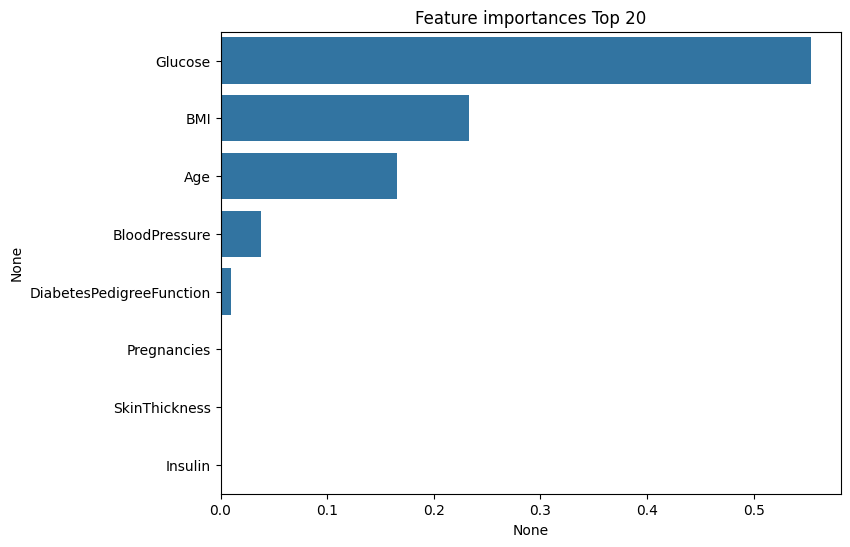

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

best_df_clf = grid_dtree.best_estimator_

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

회귀 모델 - 유튜브 조회수 예측

In [ ]:
import pandas as pd
bike_df=pd.read_csv('london_merged.csv')
bike_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike_df.isna().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [ ]:
bike_df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


y변수: cnt
x변수: t1, t2, hum, wind_speed, weather_code,is_holiyday, is_weekend, season